# INTRODUCTION
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Read Data

In [2]:
# We are reading our data
df = pd.read_csv("diabetes.csv")

In [3]:
# First 5 rows of our data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data contains; <br>

* age - age in years <br>
*Glucose - (50-500)
*Blood Pressure-(20-300)
*SkinThickness-(0-100)
*Insulin- (0-500)
*BMI-(1-100)
*DPF(Diabetes Pedigree Function)-(0-5)
* Outcome - have disease or not (1=yes, 0=no)

## Data Exploration

In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

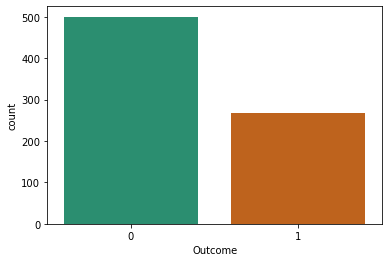

In [5]:
sns.countplot(x="Outcome", data=df, palette="Dark2")
plt.show()

In [6]:
countNoDisease = len(df[df.Outcome == 0])
countHaveDisease = len(df[df.Outcome == 1])
print("Percentage of Patients Haven't Diabetes Disease: {:.2f}%".format((countNoDisease / (len(df.Outcome))*100)))
print("Percentage of Patients Have Diabetes Disease: {:.2f}%".format((countHaveDisease / (len(df.Outcome))*100)))

Percentage of Patients Haven't Diabetes Disease: 65.10%
Percentage of Patients Have Diabetes Disease: 34.90%


In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


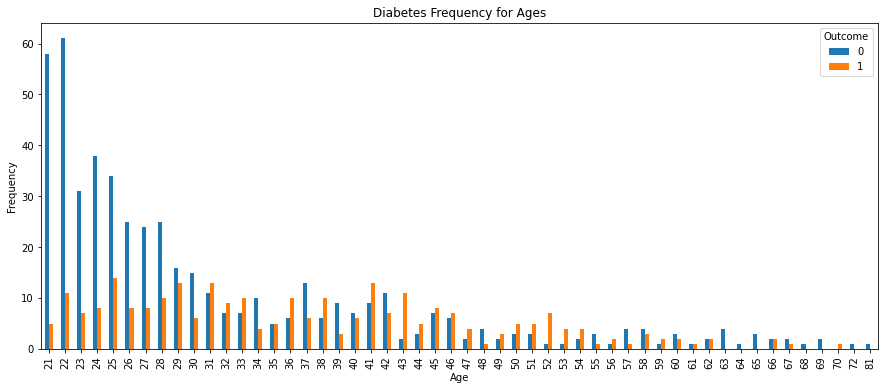

In [8]:
pd.crosstab(df.Age,df.Outcome).plot(kind="bar",figsize=(15,6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('DiabetesAndAges.png')
plt.show()

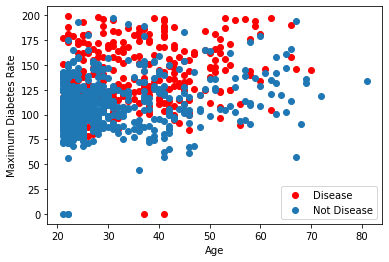

In [9]:
plt.scatter(x=df.Age[df.Outcome==1], y=df.Glucose[(df.Outcome==1)], c="red")
plt.scatter(x=df.Age[df.Outcome==0], y=df.Glucose[(df.Outcome==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Diabetes Rate")
plt.show()

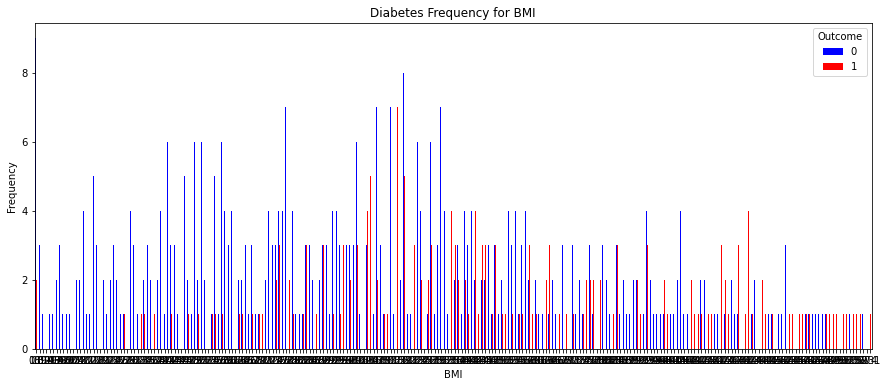

In [10]:
pd.crosstab(df.BMI,df.Outcome).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Diabetes Frequency for BMI')
plt.xlabel('BMI')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [11]:
y = df.Outcome.values
x_data = df.drop(['Outcome'], axis = 1)

### Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [13]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [15]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Let's say weight = 0.01 and bias = 0.0

In [16]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

### Sigmoid Function
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

In [17]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

### Forward and Backward Propagation
<br>
<img src="https://image.slidesharecdn.com/gradientdescentbackpropandautomaticdifferentiation-160829164205/95/gradient-descent-back-propagation-and-auto-differentiation-advanced-spark-and-tensorflow-meetup-08042016-62-638.jpg?cb=1472489358" width="500px"/>

### Cost Function
<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

### Gradient Descent
<br>
<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>

By the way in formulas; <br>
* h0(x^i)= y_head
* y^i = y_train
* x^i = x_train

In [18]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [19]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [20]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [21]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.5673525628197928


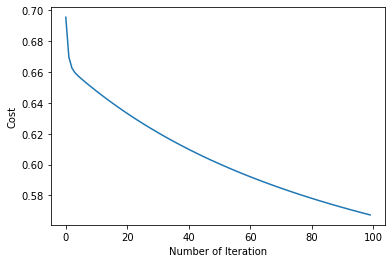

Manuel Test Accuracy: 76.62%


In [23]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

## <font color="blue">Manuel Test Accuracy is <font color="red">**76.62%**</font></font><br>
Let's find out sklearn's score.

### Sklearn Logistic Regression

In [25]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 81.82%


1. ## <font color = "purple">Our model works with <font color="red">**81.82%**</font> accuracy.</font>

## K-Nearest Neighbour (KNN) Classification
<br>
Let's see what will be score if we use KNN algorithm.

**KNN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [26]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 74.68%


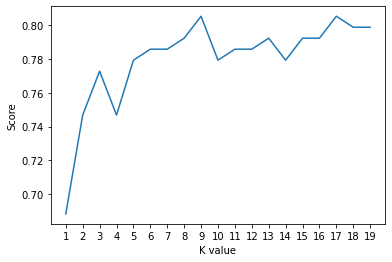

Maximum KNN Score is 80.52%


In [27]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 3-7-8 we will reach maximum score. <br>
## <font color="green">KNN Model's Accuracy is <font color="red">80.52%</font></font>

## Support Vector Machine (SVM) Algorithm 
Now we will use SVM algorithm. 

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [28]:
from sklearn.svm import SVC

In [29]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 79.87%


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 79.87%</font></font>

## Naive Bayes Algorithm

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 79.22%


## <font color="magenta">Accuracy of Naive Bayes: <font color="red">79.22%</font></font>

## Decision Tree Algorithm

**Decision Tree Algorithm**


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 79.22%


## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">79.22%</font></font>

## Random Forest Classification

In [32]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 81.82%


## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">81.82%</font></font>

## Comparing Models

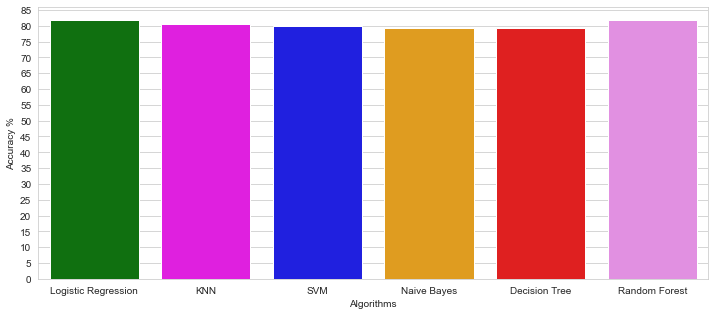

In [37]:
colors = ["green", "magenta", "blue", "orange","red","violet"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Our models work fine but best of them are Sklearn Logistics and Random Forest with 81.82% of accuracy. Let's look their confusion matrixes.

## Confusion Matrix

In [40]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [41]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


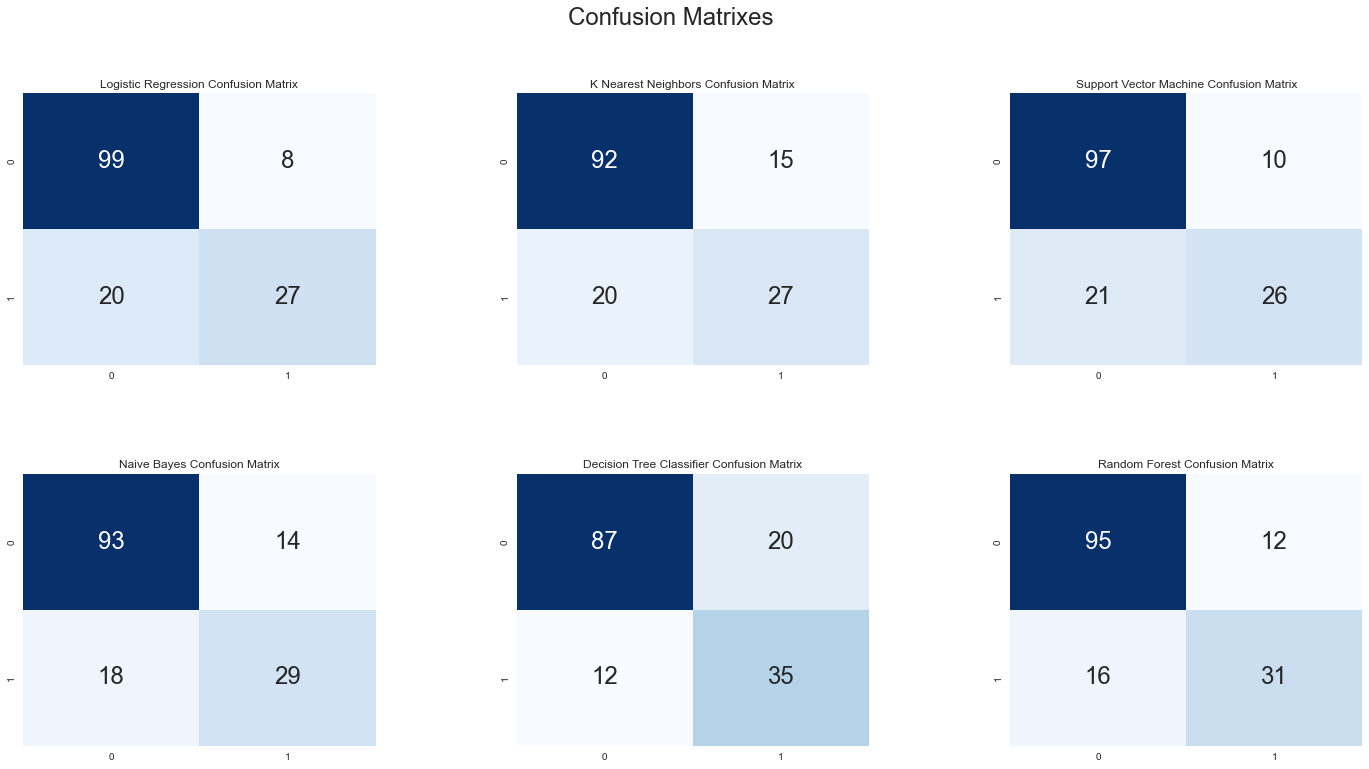

In [42]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()